<a href="https://colab.research.google.com/github/soohyoen/artificial-intelligence/blob/main/0915_class1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numpy로 구축하는 MLP

## * 문제의 성격에 따라 입력계층은 바뀌지 않습니다.
## * 문제의 성격에 따라 은닉계층은 바뀌지 않습니다.
## * 문제의 성격에 따라 출략계층은 바뀝니다.

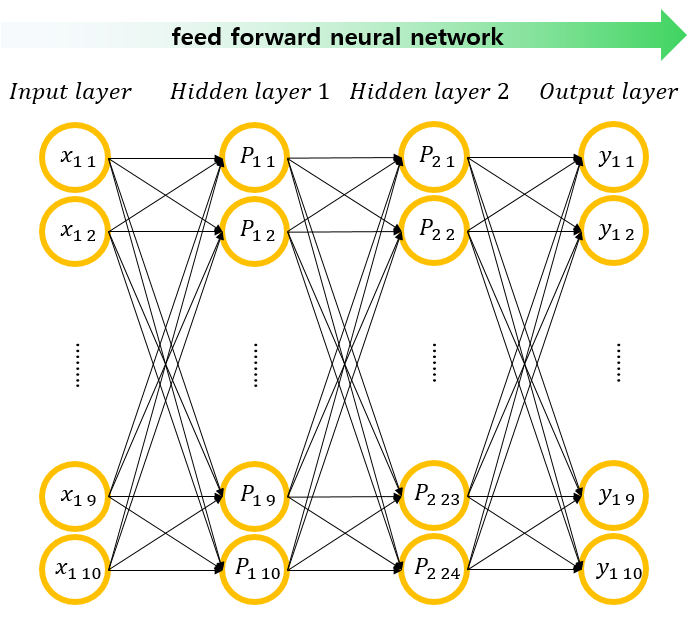

# 역전파(경사하강법)이 진행되는 흐름 및 수식 

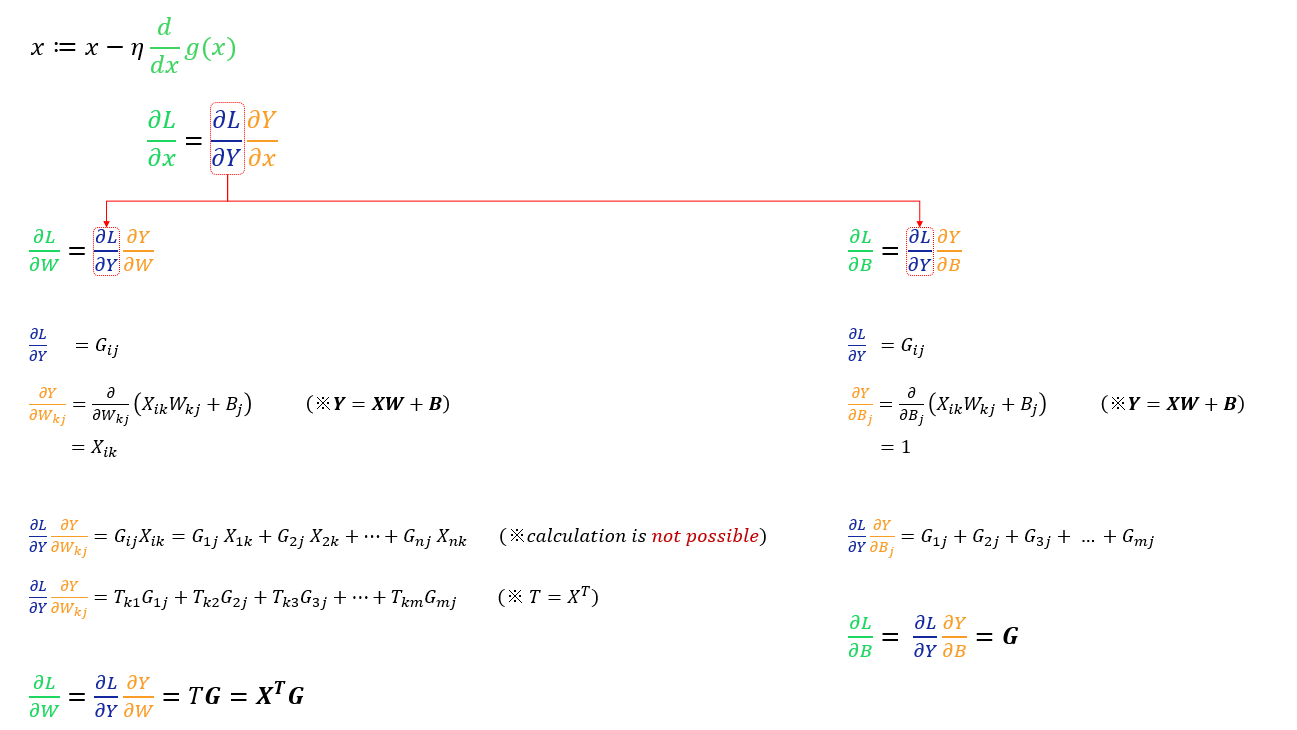

# 순전파와 역전파가 그려진 다층 신경망
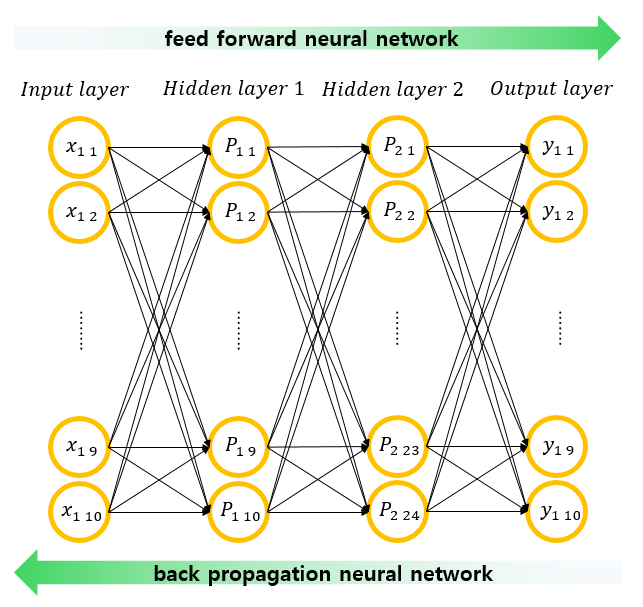

# 다수의 은닉계층이 포함된 신경망의 역전파 흐름

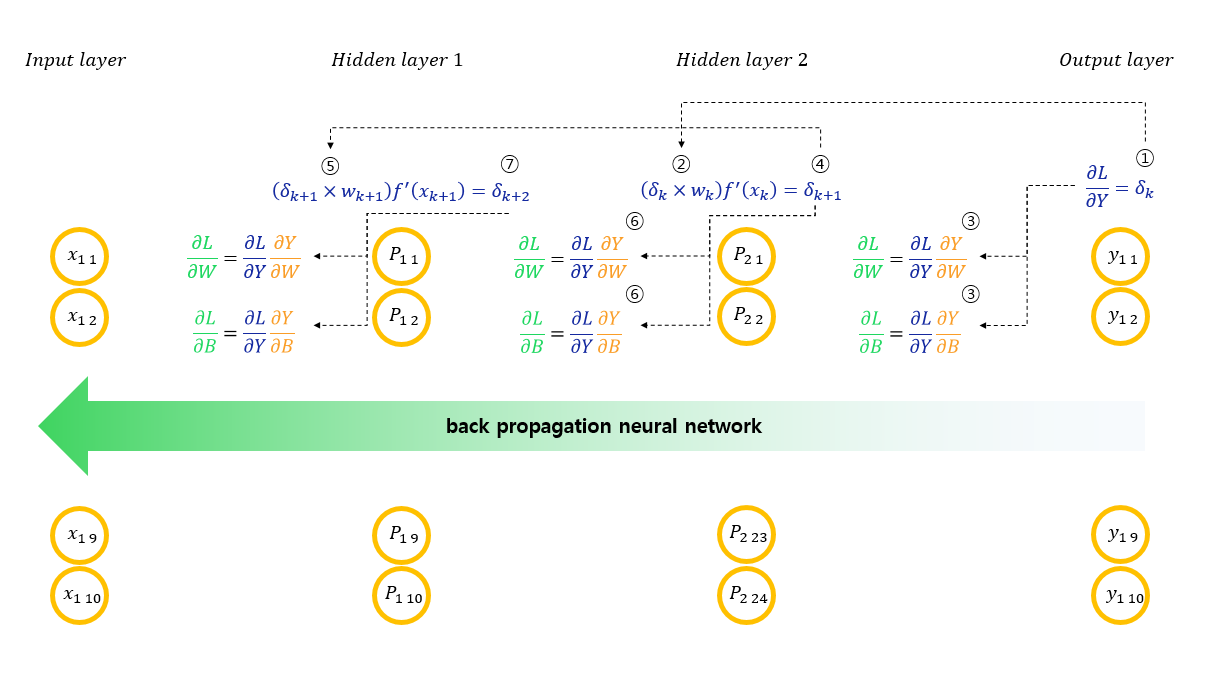

# $$ \frac{𝜕𝐿}{𝜕𝑌} = 𝛿_{𝑘+1} = (𝛿_𝑘 × 𝑤_𝑘)×𝑓'{(x_k)} $$ 

# 다수의 은닉계층이 포함된 신경망의 흐름(활성화 함수 포함)
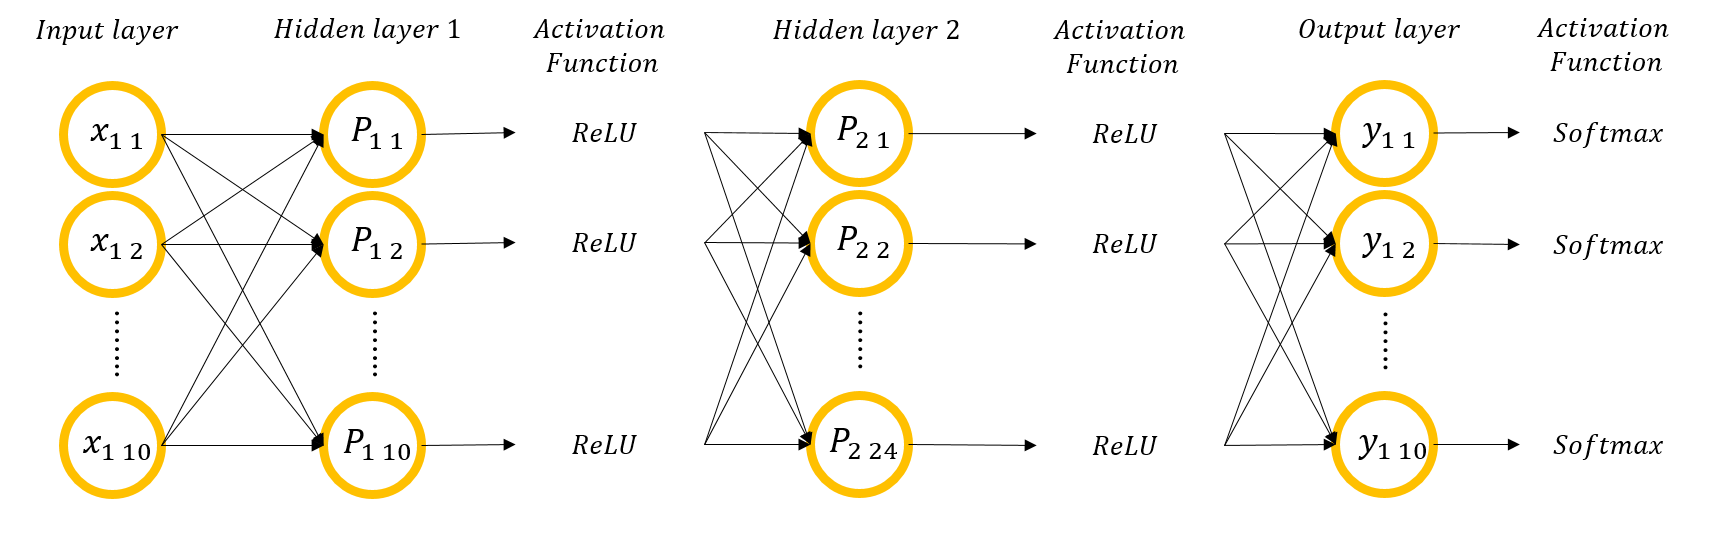

# 다수의 은닉계층이 포함된 신경망의 흐름(활성화 함수 X)

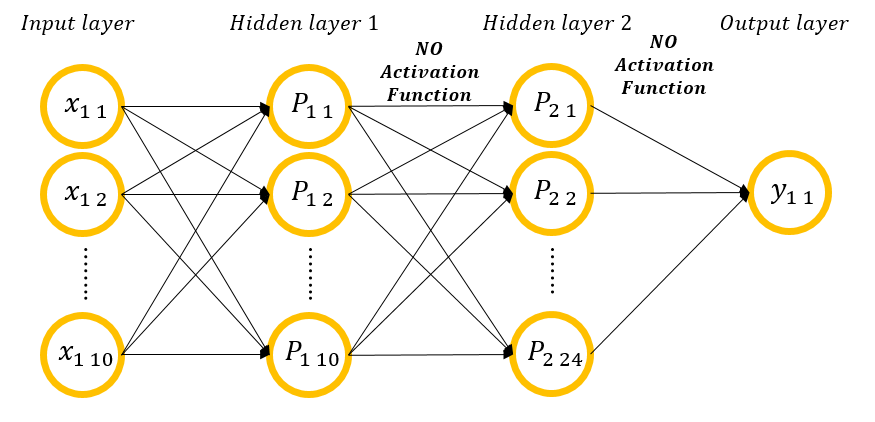

# 은닉계층에는 왜 sigmoid와 softmax를 사용하지 않을까? 
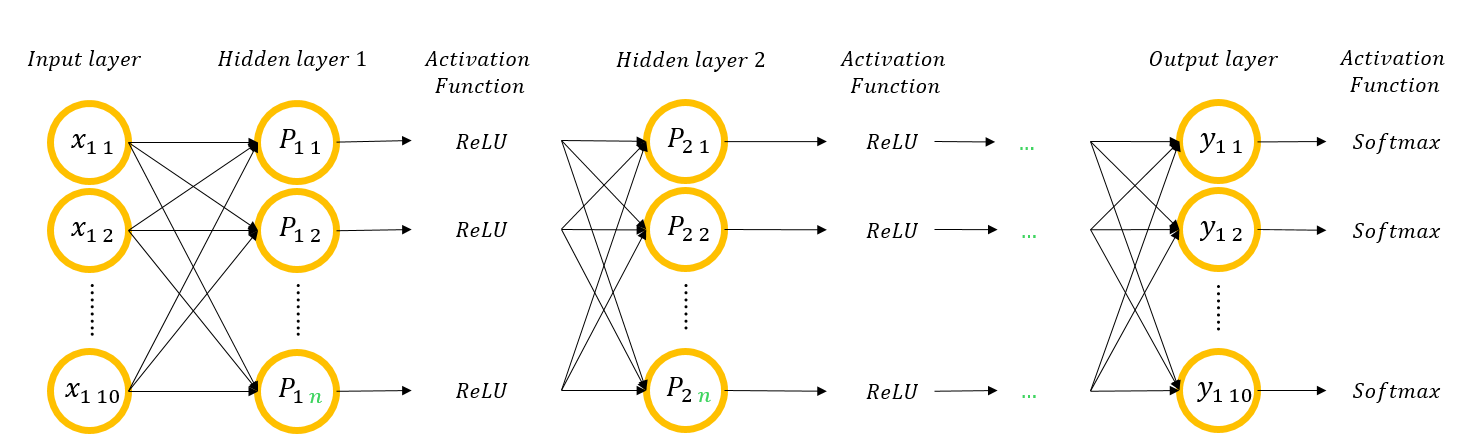

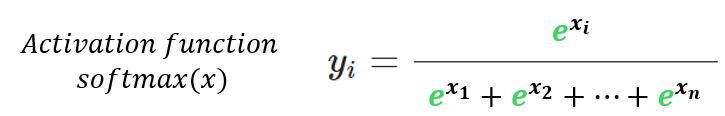

# 은닉계층에서 자주 사용되어지는 활성화 함수 ReLU
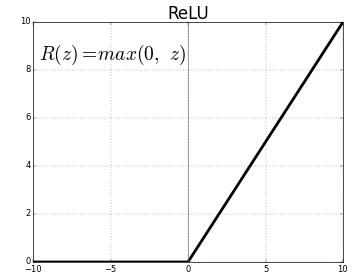

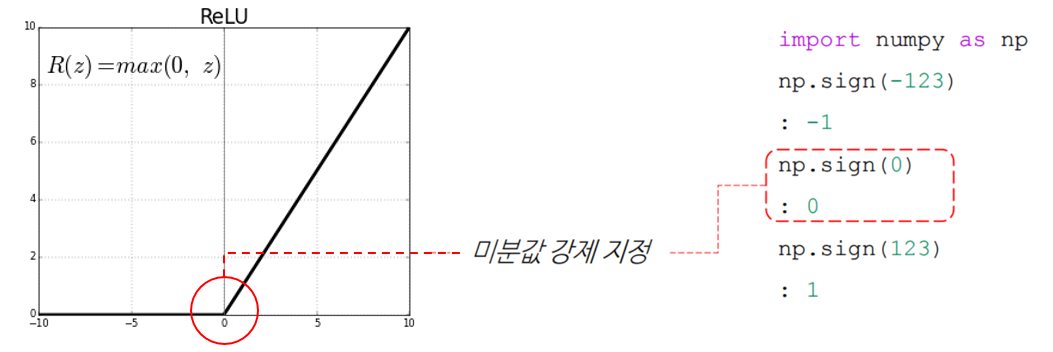

# 그렇다면 은닉계층은 몇 개를 쌓아야 하며,
# 계층마다의 노드는 몇 개를 주어야 하는가? 
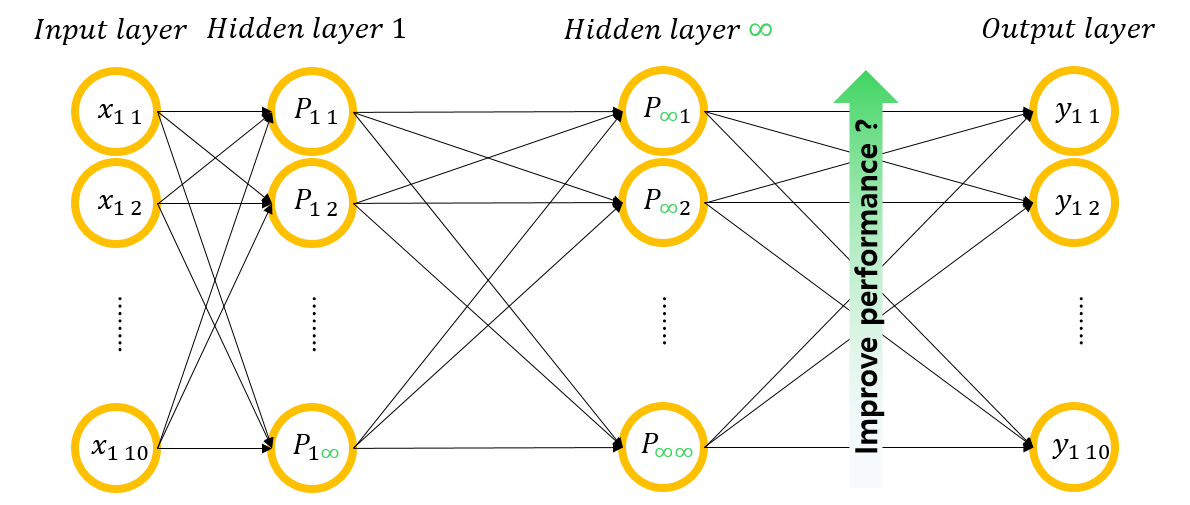 

# 오늘 구축할 은닉계층의 출력 결과 화면 

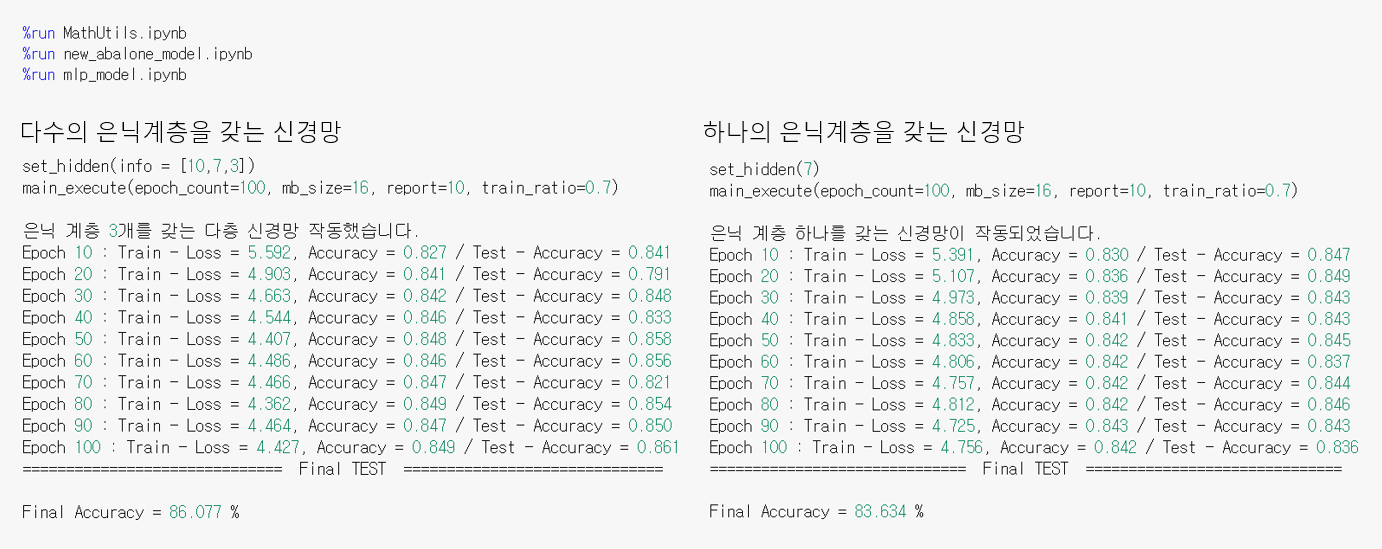

In [ ]:
%run MathUtils.ipynb
%run new_abalone_model.ipynb
%run mlp_model.ipynb

In [ ]:
set_hidden(info=[10, 7])
main_execute()

은닉 계층 2개를 갖는 다층 신경망 작동했습니다.
Epoch 2 : Train - Loss = 7.162, Accuracy = 0.810 / Test - Accuracy = 0.822
Epoch 4 : Train - Loss = 5.910, Accuracy = 0.826 / Test - Accuracy = 0.841
Epoch 6 : Train - Loss = 5.663, Accuracy = 0.829 / Test - Accuracy = 0.842
Epoch 8 : Train - Loss = 5.426, Accuracy = 0.832 / Test - Accuracy = 0.861
Epoch 10 : Train - Loss = 5.167, Accuracy = 0.837 / Test - Accuracy = 0.855
==============================  Final TEST  ==============================

Final Accuracy = 85.545 % 


In [ ]:
%run MathUtils.ipynb
%run new_pulsar_model.ipynb
%run mlp_model.ipynb

In [ ]:
set_hidden([10,7,5])
binary_classification_exec(epoch_count=100, mb_size=32, report = 10, adjust_ratio = True)

은닉 계층 3개를 갖는 다층 신경망 작동했습니다.
Epoch 10 : Train - Loss = 0.235 / Val - Loss = 0.369, Acc = 0.841, Precision = 0.996, Recall = 0.684, F1 = 0.811
Epoch 20 : Train - Loss = 0.227 / Val - Loss = 0.271, Acc = 0.890, Precision = 0.988, Recall = 0.788, F1 = 0.877
Epoch 30 : Train - Loss = 0.211 / Val - Loss = 0.258, Acc = 0.899, Precision = 0.987, Recall = 0.808, F1 = 0.888
Epoch 40 : Train - Loss = 0.208 / Val - Loss = 0.239, Acc = 0.908, Precision = 0.986, Recall = 0.827, F1 = 0.900
Epoch 50 : Train - Loss = 0.206 / Val - Loss = 0.234, Acc = 0.910, Precision = 0.985, Recall = 0.833, F1 = 0.902
Epoch 60 : Train - Loss = 0.205 / Val - Loss = 0.232, Acc = 0.912, Precision = 0.985, Recall = 0.836, F1 = 0.904
Epoch 70 : Train - Loss = 0.204 / Val - Loss = 0.244, Acc = 0.905, Precision = 0.987, Recall = 0.820, F1 = 0.896
Epoch 80 : Train - Loss = 0.202 / Val - Loss = 0.260, Acc = 0.889, Precision = 0.990, Recall = 0.785, F1 = 0.876
Epoch 90 : Train - Loss = 0.201 / Val - Loss = 0.252, Acc = 0.896, P

# mlp_model.ipynb 파일의 구축도 
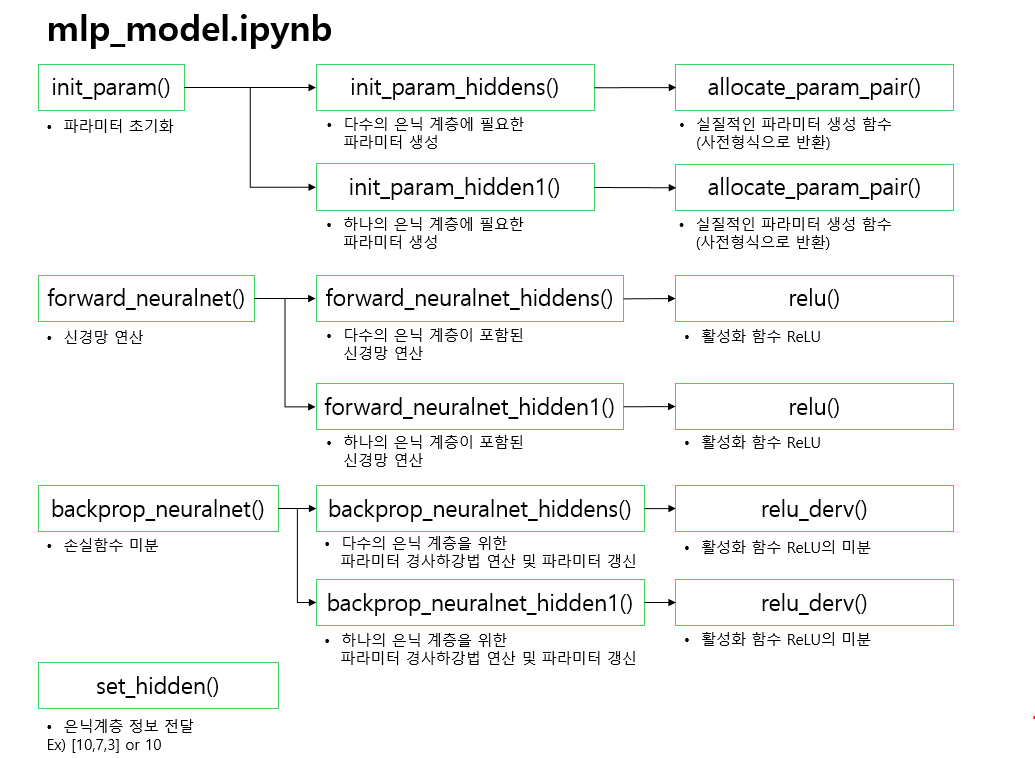

# set_hidden(info)
## - 사용자가 원하는 은닉계층의 값을 info 라는 파라미터로 받는다.  
## Ex) set_hidden(10)         / 데이터 타입 : int / hidden_cnt 변수명으로 할당  
##     set_hidden([10,5,3])  / 데이터 타입 : list / hidden_config 변수명으로 할당 


In [ ]:
def set_hidden(info):

    global hidden_cnt, hidden_config

    # 만약 사용자가 입력한 값이 int형식이라면은? 
    # 하나의 은닉계층을 갖는 신경망을 구축하고 싶다는 의미
    if isinstance(info,int):
        hidden_cnt = info
        hidden_config = None
    
    # 그렇지 않다면 ~ 
    else:
        # 사용자가 입력한 info 변수의 값을 hidden_config 라는 변수에 할당 
        hidden_config = info


In [ ]:
# info = 3    # 정수
# info = [3]  # 리스트
isinstance(info,int)

False

# init_param() 함수 정의 
## - 사용자가 입력한 은닉계층의 수에 맞춰서 파라미터 생성 함수가 동작

In [ ]:
# Ex) hidden_config = [10, 7 ,5] 

global hidden_config

def init_param():

    # 만약에 hidden_config 값이 None값이 아닌경우 
    # 다수의 은닉계층 
    if hidden_config is not None:
        #
        print("은닉 계층 {}개를 갖는 다층 신경망이 동작하였습니다."\
              .format(len(hidden_config)))
        init_param_hiddens() # 다수의 은닉계층에 필요한 파라미터를 생성하는 함수 

    else:
        print("하나의 은닉 계층을 갖는 다층 신경망이 동작하였습니다.")
        # 하나의 은닉계층인 겨우 
        init_param_hidden1() # 하나의 은닉계층에 필요한 파라미터를 생성하는 함수 

# forward_neuralnet () 함수 정의하기 
## - 사용자가 입력한 은닉계층의 정보에 맞춰 순전파 연산 함수 실행

# backprop_neuralnet () 함수 정의하기 
## - 사용자가 입력한 은닉계층의 정보에 맞춰 역전파 함수 실행

# 하나의 은닉계층이 있는 경우의 함수 
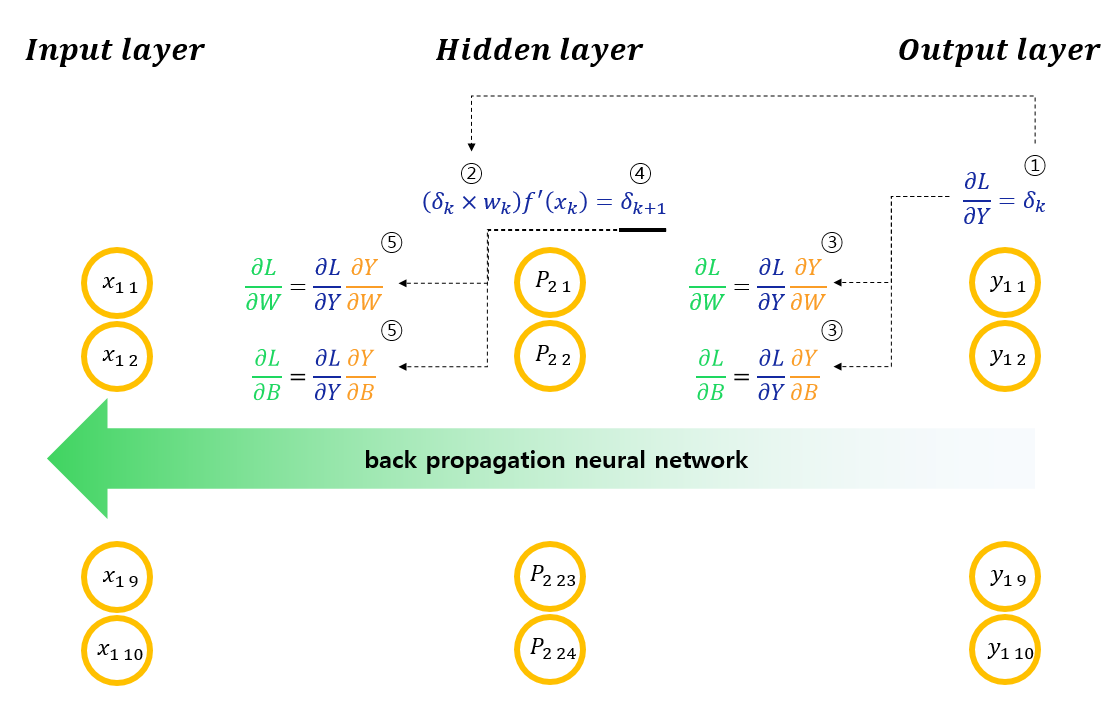

In [ ]:
def backprop_neuralnet_hidden1(G_output, aux_nn):
    # G_output = delta_k = ∂L/∂Y
    global pm_output, pm_hidden
    
    #역전파를 위해 신경망 연산 함수에서 반환한 값들을 가져옵니다.     
    x, hidden = aux_nn
    
    #---------------(∂L/∂W)------------------
    # (∂L/∂W) = hidden^T × G 를 구하는 과정에서 
    #  hidden^T 구하는 과정
    g_output_w_out = hidden.transpose()
    # 출력->은닉 계층 경사하강법을 위한 (∂L/∂W) 구하는 과정 
    # hidden^T × G
    G_w_out = np.matmul(g_output_w_out, G_output)

    #---------------(∂L/∂B)------------------
    # 출력->은닉 계층 경사하강법을 위한 (∂L/∂B) 구하는 과정 
    # G×G×...×G = G
    G_b_out = np.sum(G_output, axis = 0)
    
    # 은닉->입력 계층의 delta_(k+1) == (δ_(k+1)) 를 구하는 과정  
    # (δ_k(G_output=∂L/∂Y) × w_k) 
    # 이 과정을 먼저 해주는 이유는 업데이트가 되지 않은 가중치를
    # 활용하여 delta_(k+1)를 구해주기 위함입니다.  
    g_output_hidden = pm_output['w'].transpose()   # (δ_k×w_k) 연산하기 위한 w_k 행렬전환  
    G_hidden = np.matmul(G_output, g_output_hidden)# (δ_k×w_k) 연산 = δ_(k+1)
    
    # 출력->은닉 계층의 경사하강법
    pm_output['w'] -= LEARNING_RATE * G_w_out
    pm_output['b'] -= LEARNING_RATE * G_b_out
    
    # (δ_k×w_k)f'(hidden) = δ_(k+1) 구하는 과정 
    G_hidden = G_hidden * relu_derv(hidden)
    
    #---------------(∂L/∂W)------------------
    # (∂L/∂W) = X^T × G 를 구하는 과정에서 
    #  X^T 구하는 과정
    g_hidden_w_hid = x.transpose()
    # 은닉->입력 계층 경사하강법을 위한 (∂L/∂W) 구하는 과정 
    # X^T × G
    G_w_hid = np.matmul(g_hidden_w_hid, G_hidden)

    #---------------(∂L/∂B)------------------
    # 은닉->입력 계층 경사하강법을 위한 (∂L/∂B) 구하는 과정 
    # G×G×...×G = G
    G_b_hid = np.sum(G_hidden, axis = 0)

    # 은닉->입력 계층의 경사하강법
    pm_hidden['w'] -= LEARNING_RATE * G_w_hid
    pm_hidden['b'] -= LEARNING_RATE * G_b_hid   

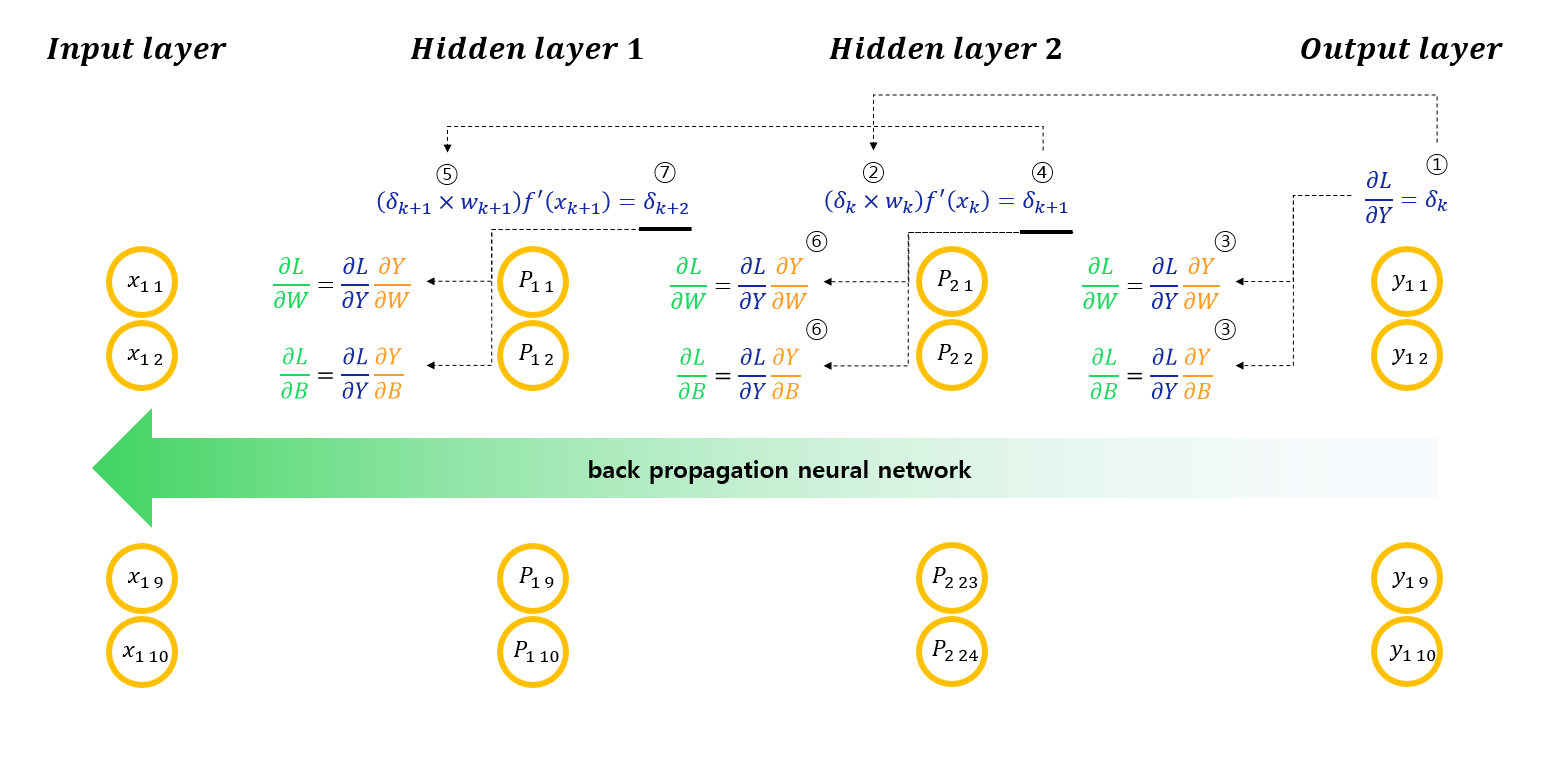

In [ ]:
def backprop_neuralnet_hiddens(G_output, aux_nn):
    global pm_output, pm_hiddens 
    
    # aux_nn에는 hiddens가 들어있으며, hiddens에는 입력 벡터, 은닉 벡터가 할당
    hiddens = aux_nn
    
    #---------------(∂L/∂W)------------------
    # (∂L/∂W) = 맨 마지막 계층의 hidden^T × G 를 구하는 과정에서 
    # hidden^T 구하는 과정
    # hiddens의 가장 마지막 값[-1]을 불러와 전치시켜 줍니다. 
    g_output_w_out = hiddens[-1].transpose()
    
    # (∂L/∂W) = 맨 마지막 계층의 hidden^T × G
    G_w_out = np.matmul(g_output_w_out, G_output)
    
    #---------------(∂L/∂B)------------------
    # 출력->마지막 은닉 계층 경사하강법을 위한 (∂L/∂B) 구하는 과정 
    # G×G×...×G = G
    G_b_out = np.sum(G_output, axis = 0)
    
    # 업데이트가 아직 되지 않은 출력계층으로 향하는 가중치를 전치하여 
    # (δ_k × w_k) 구해줄 준비를 합니다(가중치 행렬전환). 
    g_output_hidden = pm_output['w'].transpose()
    # (δ_k × w_k) 부분을 먼저 구해줍니다. 
    G_hidden = np.matmul(G_output, g_output_hidden)
    
    # 출력->마지막 은닉 계층의 파라미터 업데이트 
    pm_output['w'] -= LEARNING_RATE * G_w_out
    pm_output['b'] -= LEARNING_RATE * G_b_out
    
    # 생성된 은닉계층의 수를 파악하여 reversed()적용시켜 
    # n의 값으로 받습니다. 
    # 역전파는 맨 뒤에서 부터 적용되기에 reversed()를 적용시켜 줍니다. 
    for n in reversed(range(len(pm_hiddens))):
        # 마지막 은닉계층 이전 계층에 대한 delta_(k+1) 구해주는 과정  
        # (δ_k × w_k) → G_hidden * f'(x_k) = δ_(k+1)
        G_hidden = G_hidden * relu_derv(hiddens[n+1])
        
        #---------------(∂L/∂W)------------------
        #마지막 은닉벡터로 향하는 가중치에 전치행렬을 수행하여 줍니다. 
        g_hidden_w_hid = hiddens[n].transpose()
        G_w_hid = np.matmul(g_hidden_w_hid, G_hidden)
                
        #---------------(∂L/∂B)------------------
        G_b_hid = np.sum(G_hidden, axis = 0)
        
        # 은닉계층과 그 이전의 은닉 계층에 대한 δ_(k+2)를 구해주는 과정
        # 마지막 은닉 계층 -> 그 이전의 은닉계층에 사용되어지는 w를 전치해주는 과정
        g_hidden_hidden = pm_hiddens[n]['w'].transpose()
        # δ_(k+2)를 구하기 위해 (δ_(k+1) × δ_(w+1)) 를 구하는 과정 
        G_hidden = np.matmul(G_hidden, g_hidden_hidden)
        
        # 맨 마지막 은닉 계층과 그 이전 은닉 계층 사이의 파라미터를 업데이트 하는 과정 
        pm_hiddens[n]['w'] -= LEARNING_RATE * G_w_hid
        pm_hiddens[n]['b'] -= LEARNING_RATE * G_b_hid